In [4]:
from dataclasses import dataclass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests


In [10]:
df=pd.read_csv("/content/nutrients_csvfile.csv")

In [11]:

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


(None,
                     Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
 0             Cows' milk   1 qt.    976      660      32  40      36     0   
 1              Milk skim   1 qt.    984      360      36   t       t     0   
 2             Buttermilk   1 cup    246      127       9   5       4     0   
 3  Evaporated, undiluted   1 cup    252      345      16  20      18     0   
 4         Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   
 
   Carbs        Category  
 0    48  Dairy products  
 1    52  Dairy products  
 2    13  Dairy products  
 3    24  Dairy products  
 4   119  Dairy products  )

In [12]:
numeric_cols = ["Grams", "Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]
df[numeric_cols] = df[numeric_cols].replace("t", 0).apply(pd.to_numeric, errors="coerce")

In [13]:
df.fillna(0, inplace=True)


In [14]:
df["Food"] = df["Food"].str.strip()
df["Measure"] = df["Measure"].str.strip()
df["Category"] = df["Category"].str.strip()

In [15]:
print("\nCleaned Dataset Info:")
df.info()
print("\nFirst 5 Rows After Cleaning:")
print(df.head())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    object 
 2   Grams     335 non-null    float64
 3   Calories  335 non-null    float64
 4   Protein   335 non-null    int64  
 5   Fat       335 non-null    float64
 6   Sat.Fat   335 non-null    float64
 7   Fiber     335 non-null    float64
 8   Carbs     335 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 26.3+ KB

First 5 Rows After Cleaning:
                    Food Measure  Grams  Calories  Protein   Fat  Sat.Fat  \
0             Cows' milk   1 qt.  976.0     660.0       32  40.0     36.0   
1              Milk skim   1 qt.  984.0     360.0       36   0.0      0.0   
2             Buttermilk   1 cup  246.0     127.0        9   5.0      4.0   
3  

In [16]:
df.to_csv("cleaned_nutrients.csv", index=False)


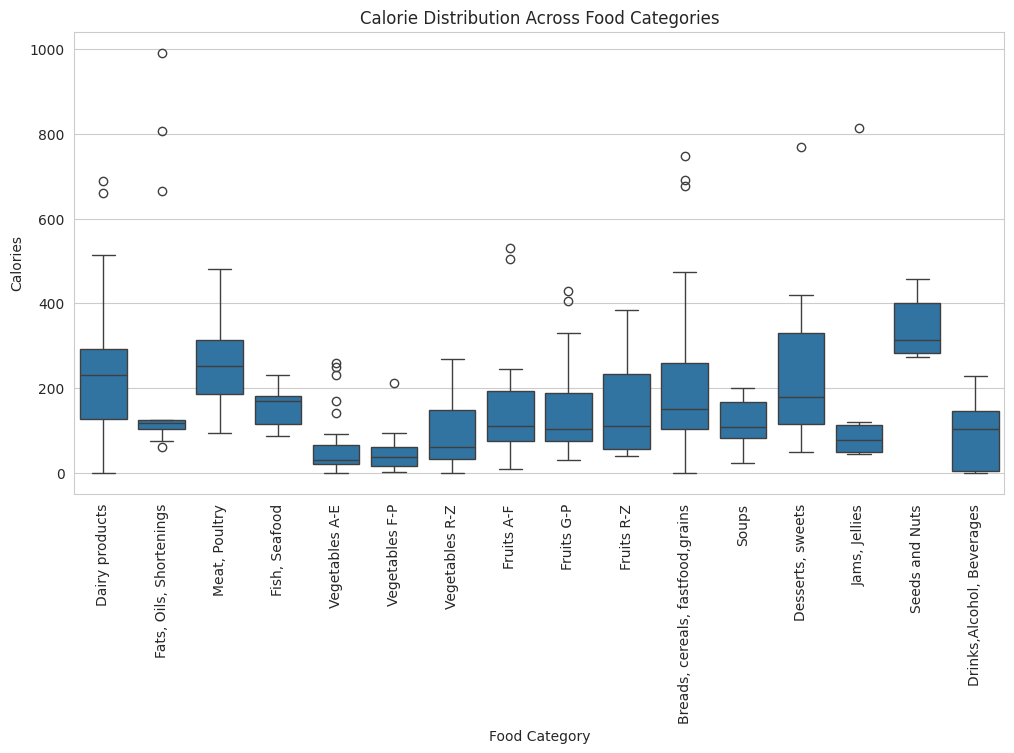

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot distribution of calories per category
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Calories", data=df)
plt.xticks(rotation=90)
plt.title("Calorie Distribution Across Food Categories")
plt.ylabel("Calories")
plt.xlabel("Food Category")
plt.show()


<ipython-input-18-f7bbffdc8e23>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Nutrient", y="Amount", data=df_melted, palette="Set2")


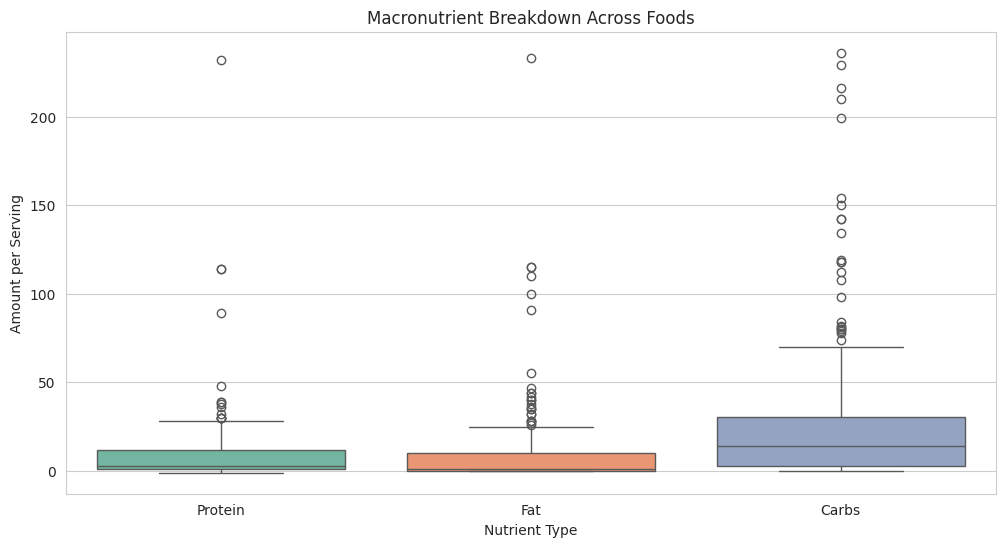

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Food", "Category"], value_vars=["Protein", "Fat", "Carbs"], var_name="Nutrient", value_name="Amount")
sns.boxplot(x="Nutrient", y="Amount", data=df_melted, palette="Set2")
plt.title("Macronutrient Breakdown Across Foods")
plt.ylabel("Amount per Serving")
plt.xlabel("Nutrient Type")
plt.show()


<ipython-input-19-7944d8ba40ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_high_calories["Food"], x=top_high_calories["Calories"], palette="Reds_r")


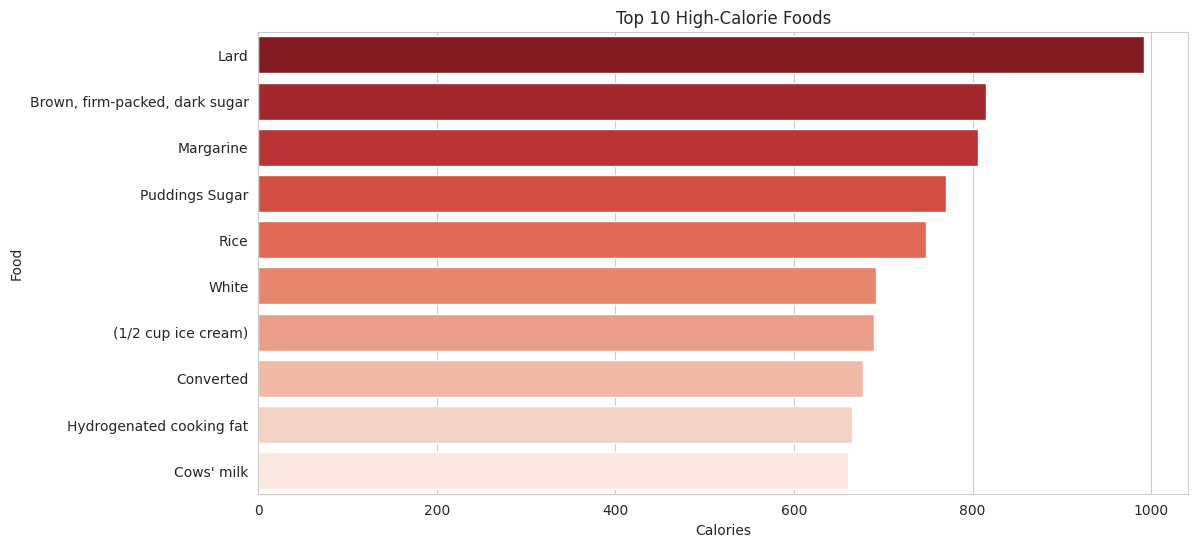

In [19]:
top_high_calories = df.nlargest(10, "Calories")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_high_calories["Food"], x=top_high_calories["Calories"], palette="Reds_r")
plt.title("Top 10 High-Calorie Foods")
plt.xlabel("Calories")
plt.ylabel("Food")
plt.show()


<ipython-input-20-9f1e25d655c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_low_calories["Food"], x=top_low_calories["Calories"], palette="Greens")


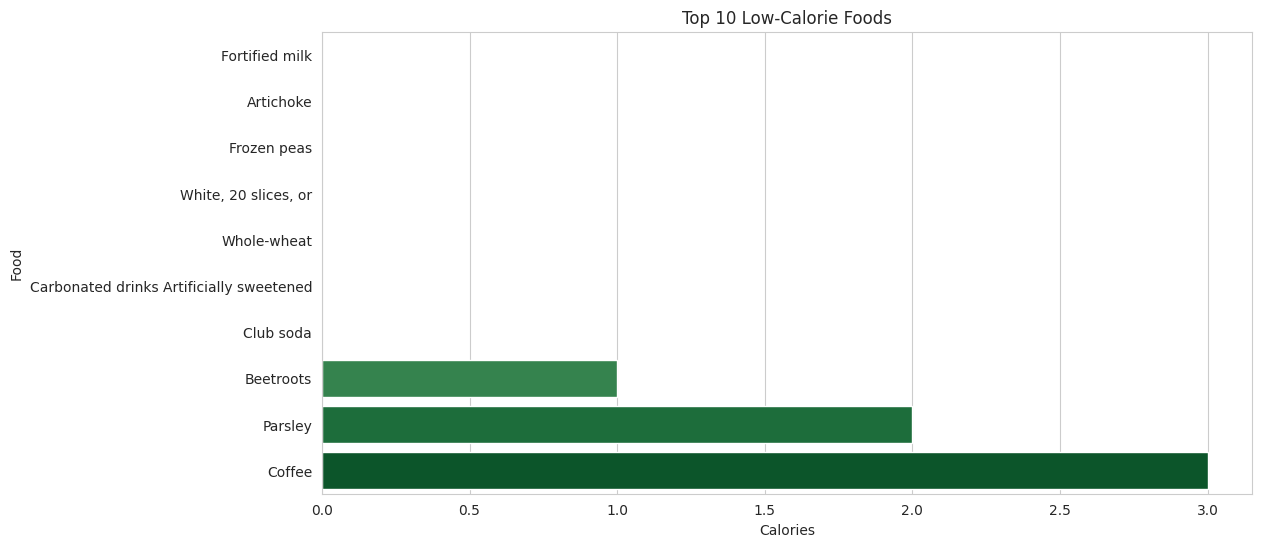

In [20]:
top_low_calories = df.nsmallest(10, "Calories")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_low_calories["Food"], x=top_low_calories["Calories"], palette="Greens")
plt.title("Top 10 Low-Calorie Foods")
plt.xlabel("Calories")
plt.ylabel("Food")
plt.show()


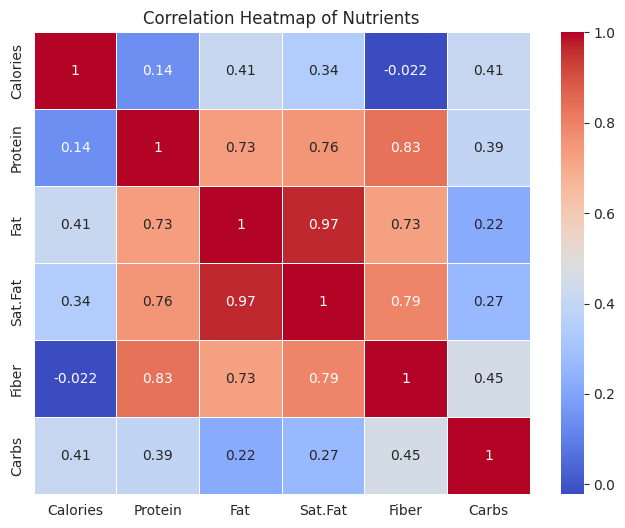

In [22]:
import numpy as np

# Compute correlation matrix
corr_matrix = df[["Calories", "Protein", "Fat", "Sat.Fat", "Fiber", "Carbs"]].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Nutrients")
plt.show()


<ipython-input-23-0b7b5e0e63f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_calories_per_category.index, x=avg_calories_per_category.values, palette="Blues_r")


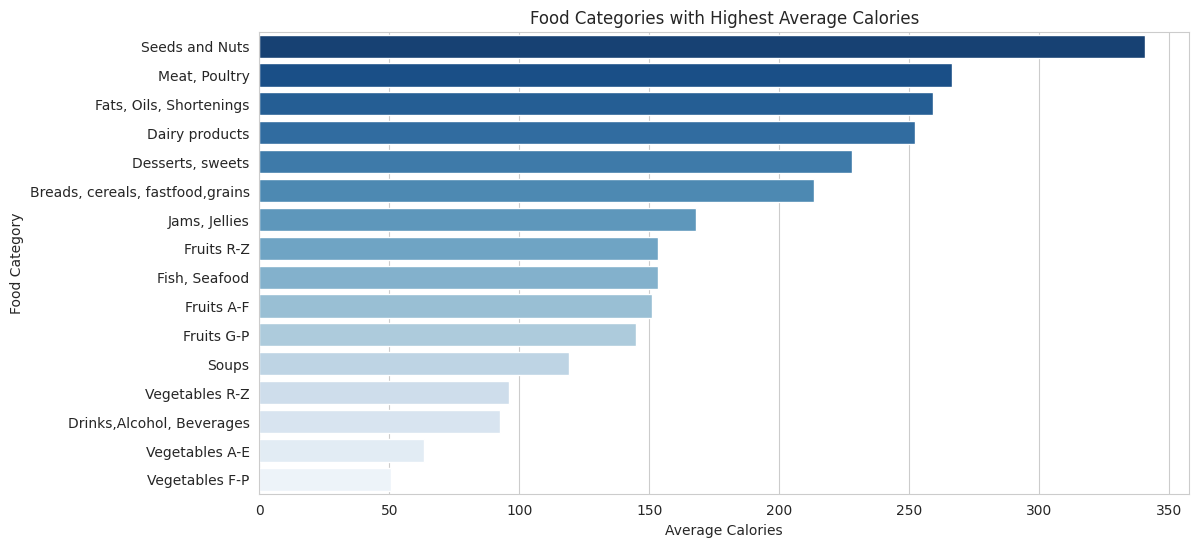

In [23]:
# Get average calories per category
avg_calories_per_category = df.groupby("Category")["Calories"].mean().sort_values(ascending=False)

# Plot the highest calorie food categories
plt.figure(figsize=(12, 6))
sns.barplot(y=avg_calories_per_category.index, x=avg_calories_per_category.values, palette="Blues_r")
plt.title("Food Categories with Highest Average Calories")
plt.xlabel("Average Calories")
plt.ylabel("Food Category")
plt.show()


In [33]:
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import os
import random

# Load the cleaned dataset
file_path = "cleaned_nutrients.csv"  # Ensure this exists in your Colab session
df = pd.read_csv(file_path)

# File to store daily calorie tracking
goal_file = "daily_calories.csv"

# Initialize tracking file if it doesn't exist
if not os.path.exists(goal_file):
    pd.DataFrame(columns=["Date", "Goal", "Calories Consumed"]).to_csv(goal_file, index=False)

# Function to get today's calorie goal and progress
def get_daily_progress():
    today = pd.Timestamp.today().strftime("%Y-%m-%d")
    try:
        goal_data = pd.read_csv(goal_file)
        if today in goal_data["Date"].values:
            entry = goal_data[goal_data["Date"] == today].iloc[0]
            return entry["Goal"], entry["Calories Consumed"]
        else:
            return 2000, 0  # Default goal if not set
    except:
        return 2000, 0  # Default values in case of an error

# Function to update calorie goal
def set_calorie_goal(goal):
    today = pd.Timestamp.today().strftime("%Y-%m-%d")
    goal_data = pd.read_csv(goal_file)

    if today in goal_data["Date"].values:
        goal_data.loc[goal_data["Date"] == today, "Goal"] = goal
    else:
        goal_data = pd.concat([goal_data, pd.DataFrame([{"Date": today, "Goal": goal, "Calories Consumed": 0}])], ignore_index=True)

    goal_data.to_csv(goal_file, index=False)
    return f"✅ Calorie Goal Updated: {goal} kcal"

# Function to track food intake and update daily progress
def get_nutrition(food_input, serving_size):
    today = pd.Timestamp.today().strftime("%Y-%m-%d")
    goal, calories_consumed = get_daily_progress()

    if not food_input.strip():
        return "Please enter at least one food item."

    food_list = [food.strip() for food in food_input.split(",") if food.strip()]

    total_calories = 0
    total_protein = 0
    total_fat = 0
    total_carbs = 0

    selected_foods_info = []

    for food_name in food_list:
        result = df[df["Food"].str.contains(food_name, case=False, na=False)]
        if result.empty:
            selected_foods_info.append(f"❌ {food_name}: Food not found.")
            continue

        item = result.iloc[0]
        factor = serving_size / item["Grams"] if item["Grams"] > 0 else 1

        calories = round(item["Calories"] * factor, 2)
        protein = round(item["Protein"] * factor, 2)
        fat = round(item["Fat"] * factor, 2)
        carbs = round(item["Carbs"] * factor, 2)

        total_calories += calories
        total_protein += protein
        total_fat += fat
        total_carbs += carbs

        selected_foods_info.append(f"""
        **🍽️ Food:** {item['Food']}
        **📏 Serving Size:** {serving_size} grams
        **🔥 Calories:** {calories} kcal
        **💪 Protein:** {protein} g
        **🥑 Fat:** {fat} g
        **🍞 Carbs:** {carbs} g
        """)

    # Update calorie tracking
    calories_consumed += total_calories
    remaining_calories = max(0, goal - calories_consumed)

    goal_data = pd.read_csv(goal_file)
    if today in goal_data["Date"].values:
        goal_data.loc[goal_data["Date"] == today, "Calories Consumed"] = calories_consumed
    else:
        goal_data = pd.concat([goal_data, pd.DataFrame([{"Date": today, "Goal": goal, "Calories Consumed": calories_consumed}])], ignore_index=True)

    goal_data.to_csv(goal_file, index=False)

    # Generate Macronutrient Chart
    fig, ax = plt.subplots(figsize=(5, 4))
    nutrients = ["Protein", "Fat", "Carbs"]
    amounts = [total_protein, total_fat, total_carbs]
    ax.bar(nutrients, amounts, color=["blue", "red", "green"])
    ax.set_ylabel("Grams")
    ax.set_title("Macronutrient Breakdown")
    plt.tight_layout()

    # AI Food Recommendation to meet remaining calories
    recommended_foods = get_food_recommendations(remaining_calories, total_protein, total_fat, total_carbs)

    # Progress Bar
    progress_bar = f"**🏆 Daily Goal:** {goal} kcal\n🔥 **Calories Consumed:** {calories_consumed} kcal\n⚡ **Remaining Calories:** {remaining_calories} kcal"

    return "\n".join(selected_foods_info) + f"\n\n{progress_bar}\n\nRecommended Foods to Meet Your Goal:\n" + "\n".join(recommended_foods), fig

# AI Recommendation Logic based on remaining calories
def get_food_recommendations(remaining_calories, total_protein, total_fat, total_carbs):
    # Let's assume we have a list of food items with their nutritional info (in reality, you can filter from the dataset)
    recommended_foods = []

    # Filter foods based on remaining calories and macronutrient needs
    food_candidates = df[(df["Calories"] <= remaining_calories) & (df["Protein"] >= total_protein / 2)]  # Example logic
    for _, food_item in food_candidates.iterrows():
        food = food_item["Food"]
        calories = food_item["Calories"]
        protein = food_item["Protein"]
        fat = food_item["Fat"]
        carbs = food_item["Carbs"]
        recommended_foods.append(f"**{food}** - {calories} kcal, {protein}g Protein, {fat}g Fat, {carbs}g Carbs")

    # Randomly select a few suggestions (can be adjusted for more complex recommendation logic)
    return random.sample(recommended_foods.tolist(), min(5, len(recommended_foods)))

# Gradio UI Components
with gr.Blocks() as app:
    gr.Markdown("# 🥗 Advanced Calorie Tracker with Daily Goal")
    gr.Markdown("### ✅ Enter Foods, Adjust Serving Size, Track Daily Calories & Stay on Target!")

    # Set Calorie Goal
    goal_input = gr.Number(value=get_daily_progress()[0], label="Set Daily Calorie Goal (kcal)")
    set_goal_btn = gr.Button("Update Goal")
    goal_output = gr.Markdown()

    with gr.Row():
        food_textbox = gr.Textbox(label="Enter Food(s) (comma-separated)", placeholder="e.g., Apple, Chicken Breast, Rice")

    serving_size_slider = gr.Slider(50, 500, step=10, value=100, label="Serving Size (grams)")

    calculate_btn = gr.Button("Log Meal")

    output_text = gr.Markdown()
    output_chart = gr.Plot()

    # Set Goal Functionality
    set_goal_btn.click(set_calorie_goal, inputs=[goal_input], outputs=[goal_output])

    # On button click, log meal
    calculate_btn.click(get_nutrition, inputs=[food_textbox, serving_size_slider], outputs=[output_text, output_chart])

# Launch the app
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e61c1254088ba036c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
